In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df = pd.read_csv("datasets/emissions.csv")

In [3]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
Cylinders,7385.0,5.615030,1.828307,3.0,4.0,6.0,6.0,16.0
Fuel Consumption City (L/100 km),7385.0,12.556534,3.500274,4.2,10.1,12.1,14.6,30.6
Fuel Consumption Hwy (L/100 km),7385.0,9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
Fuel Consumption Comb (L/100 km),7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
Fuel Consumption Comb (mpg),7385.0,27.481652,7.231879,11.0,22.0,27.0,32.0,69.0
CO2 Emissions(g/km),7385.0,250.564523,58.567857,16.0,208.0,246.0,288.0,522.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

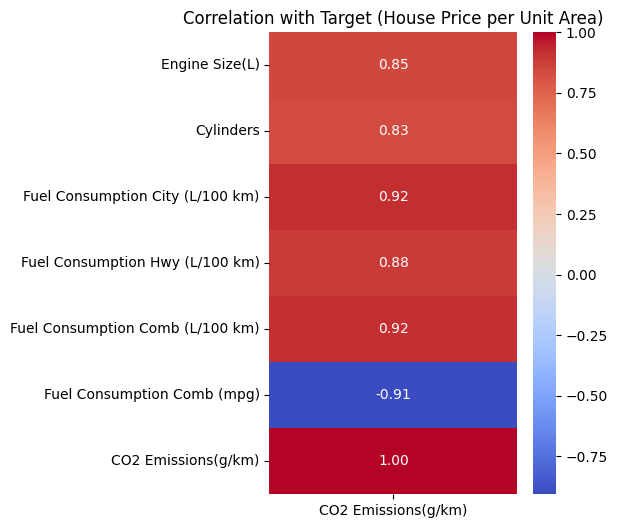

In [6]:
corr = df.corr(numeric_only=True)[["CO2 Emissions(g/km)"]]

plt.figure(figsize=(4,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation with Target (House Price per Unit Area)", fontsize=12)
plt.show()

In [7]:
sdf = df[
    ["Engine Size(L)", 
     "Cylinders", 
     "Fuel Consumption City (L/100 km)", 
     "Fuel Consumption Hwy (L/100 km)", 
     "Fuel Consumption Comb (L/100 km)",
     "CO2 Emissions(g/km)"]
    ]

In [8]:
before = sdf.shape

z = zscore(sdf)
sdf = sdf[(np.abs(z) <= 3).all(axis=1)]

print(f"Removed Data: {before[0] - sdf.shape[0]}")
print(f"Before: {before}")
print(f"After: {sdf.shape}")

Removed Data: 247
Before: (7385, 6)
After: (7138, 6)


In [9]:
y = sdf["CO2 Emissions(g/km)"]
x = sdf.drop(columns="CO2 Emissions(g/km)")

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)

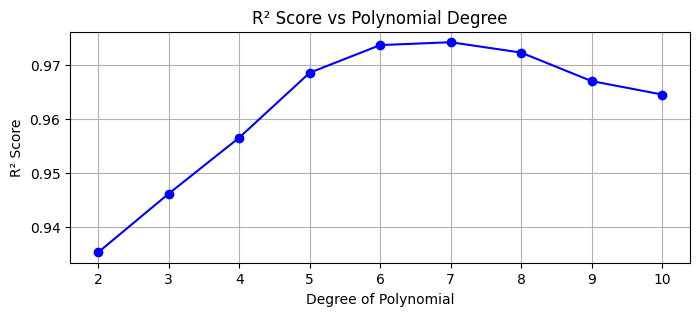

Best degree: 7


In [10]:
result = []

for i in range(2, 11):
    poly = PolynomialFeatures(degree=i)
    x_train_poly = poly.fit_transform(x_train)
    
    model = LinearRegression()
    model.fit(x_train_poly, y_train)
    
    x_test_poly = poly.transform(x_test)
    y_pred = model.predict(x_test_poly)

    r2 = r2_score(y_test, y_pred)
    
    result.append({"degree": i, "r2_score": r2})

degrees = [j["degree"] for j in result]
r2_scores = [k["r2_score"] for k in result]
        
plt.figure(figsize=(8, 3))
plt.plot(degrees, r2_scores, marker="o", color="b")
plt.title("R² Score vs Polynomial Degree")
plt.xlabel("Degree of Polynomial")
plt.ylabel("R² Score")
plt.grid(True)
plt.show()

for i in result:
    if i["r2_score"] == max(r2_scores):
        print(f"Best degree: {i["degree"]}")

In [11]:
poly = PolynomialFeatures(degree=7)
x_train_poly = poly.fit_transform(x_train)

In [12]:
model = LinearRegression()
model.fit(x_train_poly, y_train)

coef = model.coef_
intercept = model.intercept_

print(f"coef: {coef}\nintercept: {intercept}")

coef: [ 1.12803257e-03  3.62640821e+00  3.70568993e+00  5.61190134e+00
  6.44882684e+00  2.23871108e+00  1.63077678e+01  7.61538465e+00
  4.06447070e+00  8.95232778e+00  4.48144754e+00  9.82950890e+00
  1.31546434e+01  2.30992683e+01  7.87224926e+00  2.68177367e+01
  3.76201744e+00  8.10510652e+00  6.67923030e+00  1.08738056e+00
  9.83946069e-01  4.66646201e+00  3.74688043e+01  2.55738054e+01
  2.63173419e+01  1.64514600e+01  2.37145036e+00 -2.73943933e+00
  8.73627588e+00 -2.37053828e+00 -4.93783457e+00 -1.52403385e+01
 -3.41803728e+00  1.52365405e+01 -2.71806700e+00  6.08837041e+00
  1.13613951e+00  1.81095507e+01  4.93117343e+01  9.41002186e+00
  7.17978072e+00 -2.44345232e+01 -2.67974658e+01  1.95152457e+00
 -1.68122431e+01 -2.71680327e+01  4.42756222e+00  3.13240987e+00
 -1.07892268e+01 -1.04587774e+00  1.43801646e+00 -1.12601340e+01
 -6.64173055e-01 -6.21114339e-02  7.71848477e+00  2.46687573e+00
 -3.73482091e+01  2.34700950e+00 -3.99909874e+01 -4.12518767e+01
 -7.43060612e+01  7

In [13]:
x_test_poly = poly.transform(x_test)
y_pred = model.predict(x_test_poly)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R2 Score: {r2:.2f}")

MSE: 76.15
MAE: 4.47
R2 Score: 0.97


In [14]:
x_train_poly = poly.transform(x_train)
y_train_pred = model.predict(x_train_poly)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2

print(f"R2 Train: {r2_train:.3f}")
print(f"R2 Test: {r2_test:.3f}")
print(f"Difference (Train - Test): {r2_train - r2_test:.3f}")

R2 Train: 0.983
R2 Test: 0.974
Difference (Train - Test): 0.009


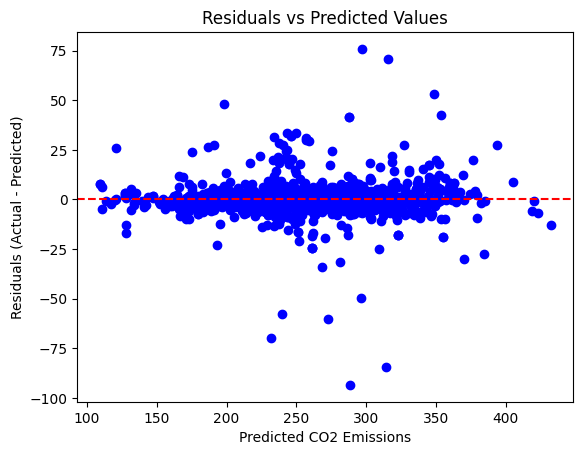

In [15]:
residuals = y_test - y_pred

plt.scatter(y_pred, residuals, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted CO2 Emissions")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals vs Predicted Values")
plt.show()